In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
# set this so the graphs open internally
%matplotlib inline
import seaborn as sns

In [9]:
df = pd.read_csv('./StudentsPerformance.csv')
df.head (5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [51]:
df_new = df.rename(columns={'race/ethnicity': 'RaceEthnicity', 'parental level of education':'paleEdu','test preparation course':'test-pcourse', 'math score':'mathscore', 'reading score':'readingscore', 'writing score':'writingscore' }) #, index={'ONE': 'one'}
df_new.head()

,gender,RaceEthnicity,paleEdu,lunch,test-pcourse,mathscore,readingscore,writingscore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<function matplotlib.pyplot.show(*args, **kw)>

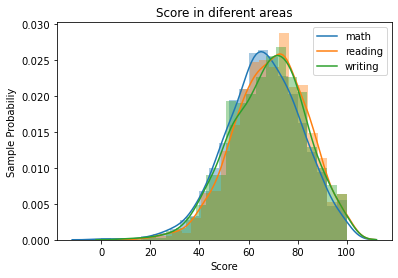

In [63]:
# First one
sns.distplot(df_new.mathscore, kde_kws={'label': 'math'})
sns.distplot(df_new.readingscore, kde_kws={'label': 'reading'})
sns.distplot(df_new.writingscore, kde_kws={'label': 'writing'})

plt.title ('Score in diferent areas') # would be nice compare the score in diferent areas with parent level educat
plt.xlabel('Score')
plt.ylabel('Sample Probabiliy')
plt.show

In [47]:
df_new.head()


,gender,RaceEthnicity,paleEdu,lunch,test-pcourse,mathscore,readingscore,writingscore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [52]:
# Rename none as "No Preparation Course"
# and completed as Preparation

df_new.loc[df_new['test-pcourse']=='completed', 'test-pcourse']='Course'
df_new.loc[df_new['test-pcourse']=='none', 'test-pcourse']='NO Course'
df_new.head()

,gender,RaceEthnicity,paleEdu,lunch,test-pcourse,mathscore,readingscore,writingscore
0,female,group B,bachelor's degree,standard,NO Course,72,72,74
1,female,group C,some college,standard,Course,69,90,88
2,female,group B,master's degree,standard,NO Course,90,95,93
3,male,group A,associate's degree,free/reduced,NO Course,47,57,44
4,male,group C,some college,standard,NO Course,76,78,75


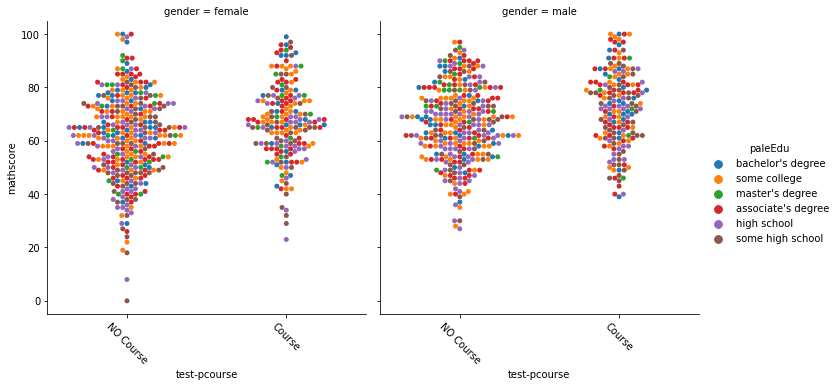

In [53]:
#second one
# Factor Plot
g = sns.catplot(x='test-pcourse', 
                   y='mathscore', 
                   data=df_new, 
                   hue='paleEdu',  # Color by parents level education
                   col='gender',  # Separate by gender
                   kind='swarm') # Swarmplot 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

plt.xlabel('Record count') # Amount of children whose parents have this education level 
plt.ylabel('Parents Education Level')
plt.title('Parents education vs count')

Text(0.5, 1.0, 'Parents education vs count')

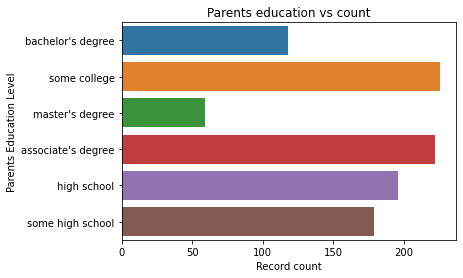

In [62]:
# third one
#plot bar about parents level educarion
sns.countplot(y='paleEdu', data=df_new)
plt.xlabel('Record count') # Amount of children whose parents have this education level 
plt.ylabel('Parents Education Level')
plt.title('Parents education vs count')


<function matplotlib.pyplot.show(*args, **kw)>

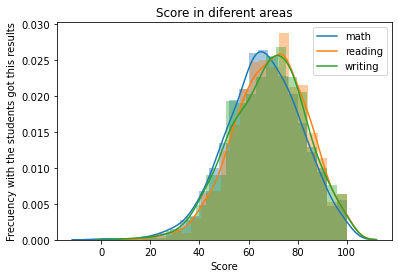

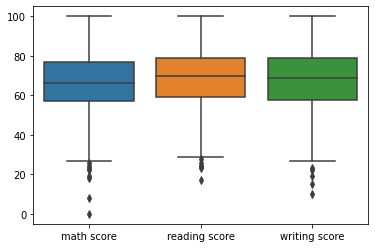

In [25]:
sns.boxplot(data=df)